In [2]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('downloads/Relaxing Bass Guitar Music, my Original.wav', sr=44100)

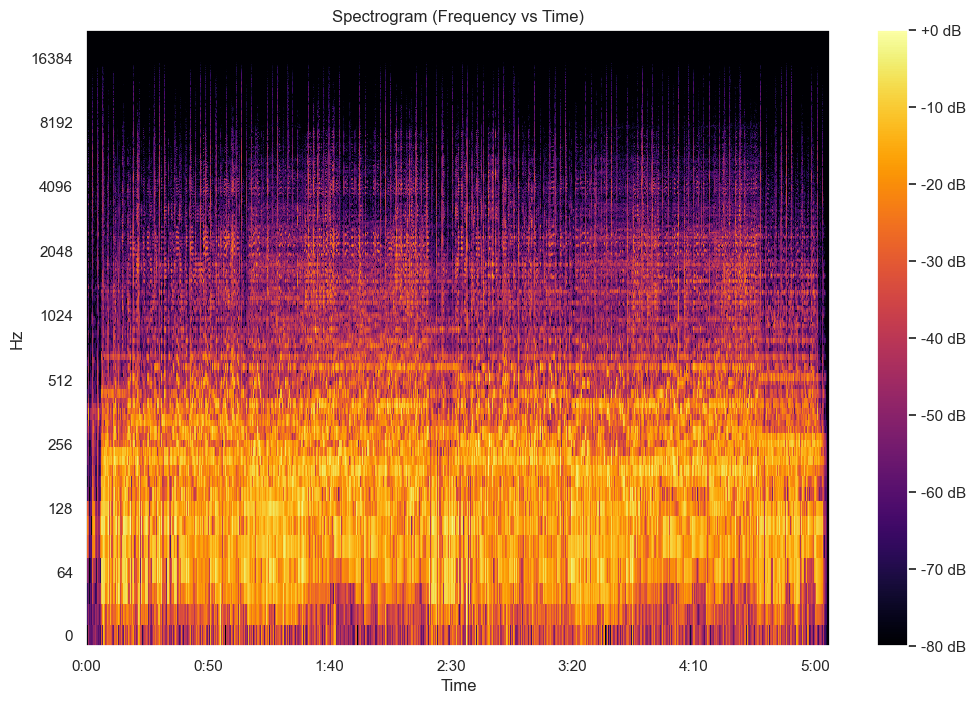

In [ ]:
import numpy as np
import seaborn as sns
sns.set_theme()

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max) # Calculate the spectrum diagram
plt.figure(figsize=(12, 8))
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr, cmap='inferno') # Use logarithmic frequency
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Frequency vs Time)')
plt.show()

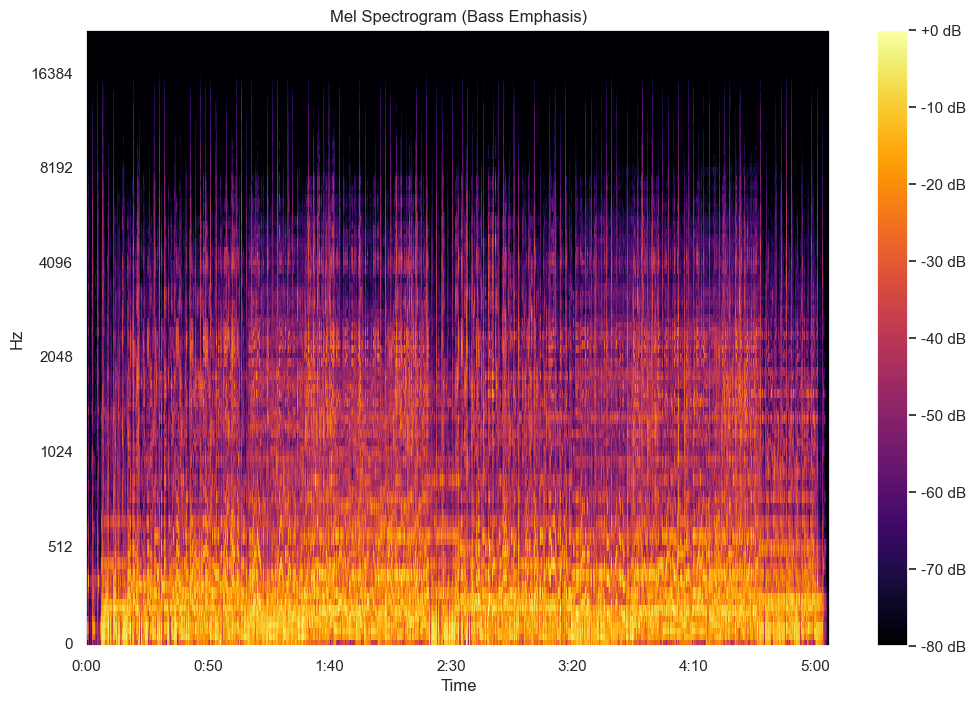

In [5]:
import matplotlib.pyplot as plt


mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(12, 8))
librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=sr, cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (Bass Emphasis)')
plt.show()

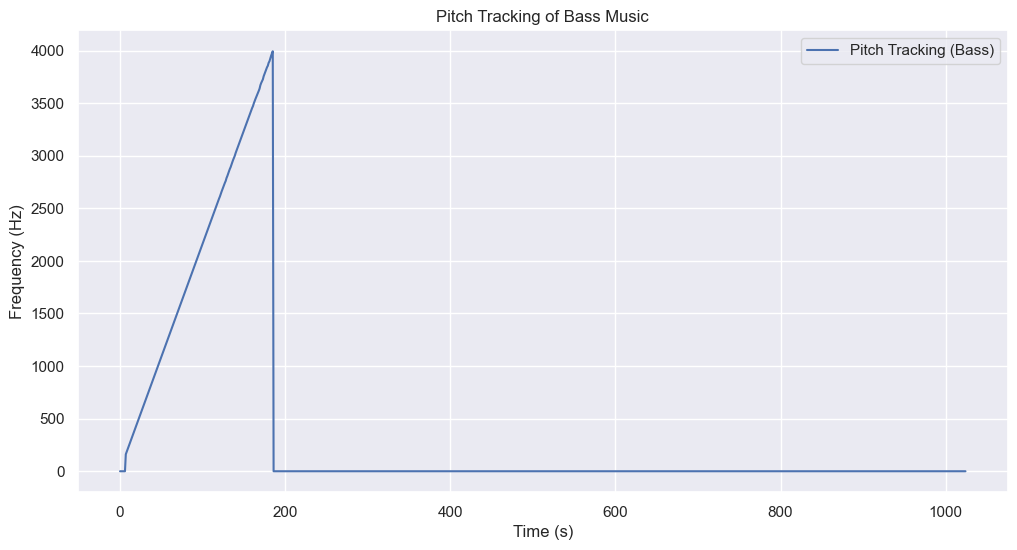

In [6]:
pitches, magnitudes = librosa.core.piptrack(y=y, sr=sr)

# Find the maximum pitch (fundamental frequency)
pitch_max = [np.max(p) for p in pitches]
plt.figure(figsize=(12, 6))
plt.plot(pitch_max, label='Pitch Tracking (Bass)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Pitch Tracking of Bass Music')
plt.legend()
plt.show()

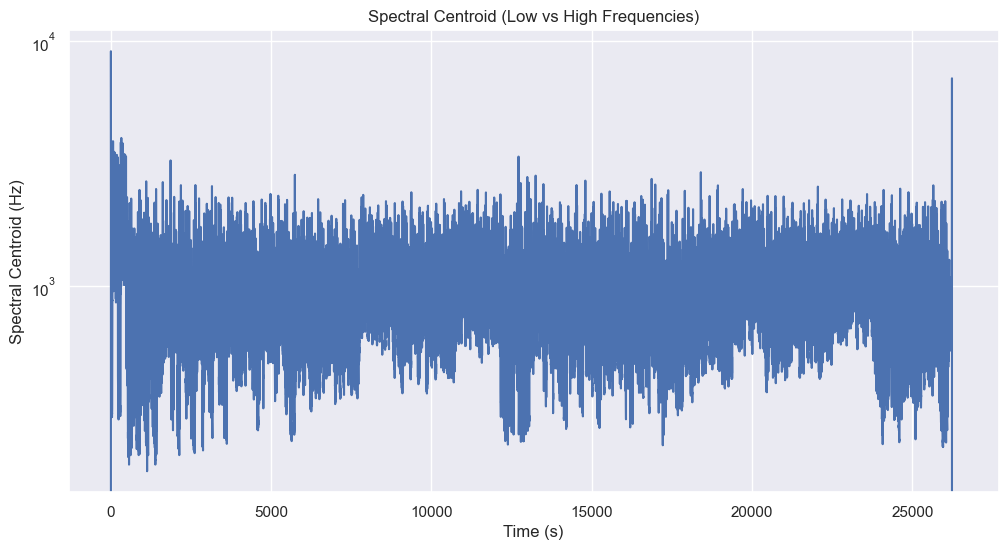

In [7]:
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)

plt.figure(figsize=(12, 6))
plt.semilogy(spectral_centroid.T, label='Spectral Centroid')
plt.ylabel('Spectral Centroid (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectral Centroid (Low vs High Frequencies)')
plt.show()

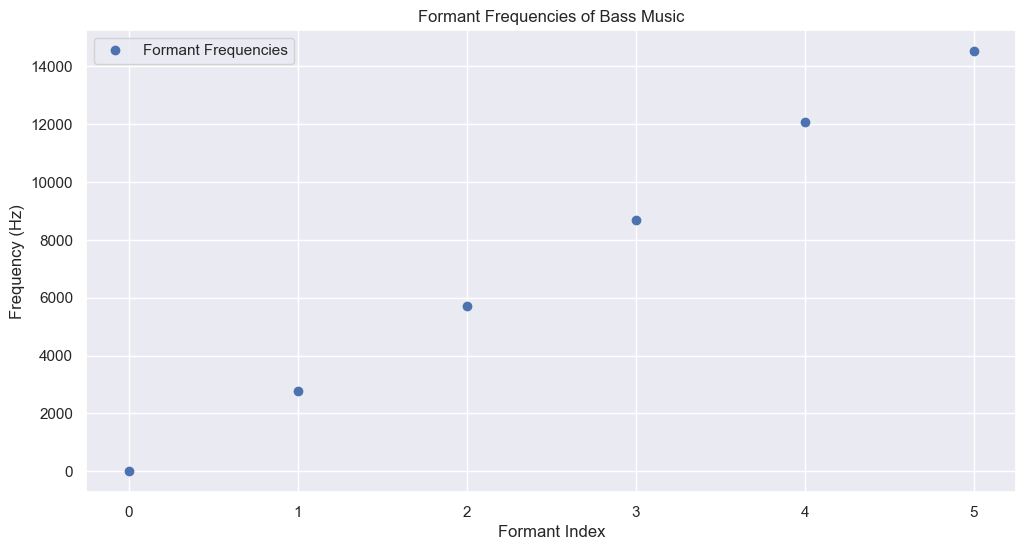

In [8]:
from turbolpc import analysis


def extract_formants(y, sr, order=12):
    lpc_coeffs = analysis.arburg_vector(x=y, order=order)
    
    # Compute LPC roots whose real parts correspond to Formants frequencies
    roots = np.roots(lpc_coeffs[0])
    positive_roots = [r for r in roots if np.imag(r) >= 0]  # Select roots with positive real part
    angles = np.angle(positive_roots)
    formants = sorted([angle * (sr / (2 * np.pi)) for angle in angles])
    
    return formants

formants = extract_formants(y, sr)
plt.figure(figsize=(12, 6))
plt.plot(formants, 'o', label='Formant Frequencies')
plt.xlabel('Formant Index')
plt.ylabel('Frequency (Hz)')
plt.title('Formant Frequencies of Bass Music')
plt.legend()
plt.show()